# Dataset Breast Cancer

## Decision Tree Classifier

Berikut ini merupakan implementasi algoritma Decision Tree CLassifier menggunakan library scikit-learn.

### Setup Library dan Dataset

In [198]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2)

# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.36820,0.26780,0.15560,0.3196,0.11510
363,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,...,18.13,25.45,117.20,1009.0,0.1338,0.16790,0.16630,0.09123,0.2394,0.06469
28,15.30,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,0.06540,...,20.27,36.71,149.30,1269.0,0.1641,0.61100,0.63350,0.20240,0.4027,0.09876
50,11.76,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,...,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563
111,12.63,20.76,82.15,480.4,0.09933,0.12090,0.10650,0.06021,0.1735,0.07070,...,13.33,25.47,89.00,527.4,0.1287,0.22500,0.22160,0.11050,0.2226,0.08486


### Preprocessing and Pipelining

In [199]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing for numerical data
numerical_transformer = SimpleImputer()

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

### Create model

In [200]:
from sklearn import tree
import sklearn.linear_model as lm
# Define model
modelDTL = tree.DecisionTreeClassifier(random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', modelDTL)
                     ])

### Fitting and predict

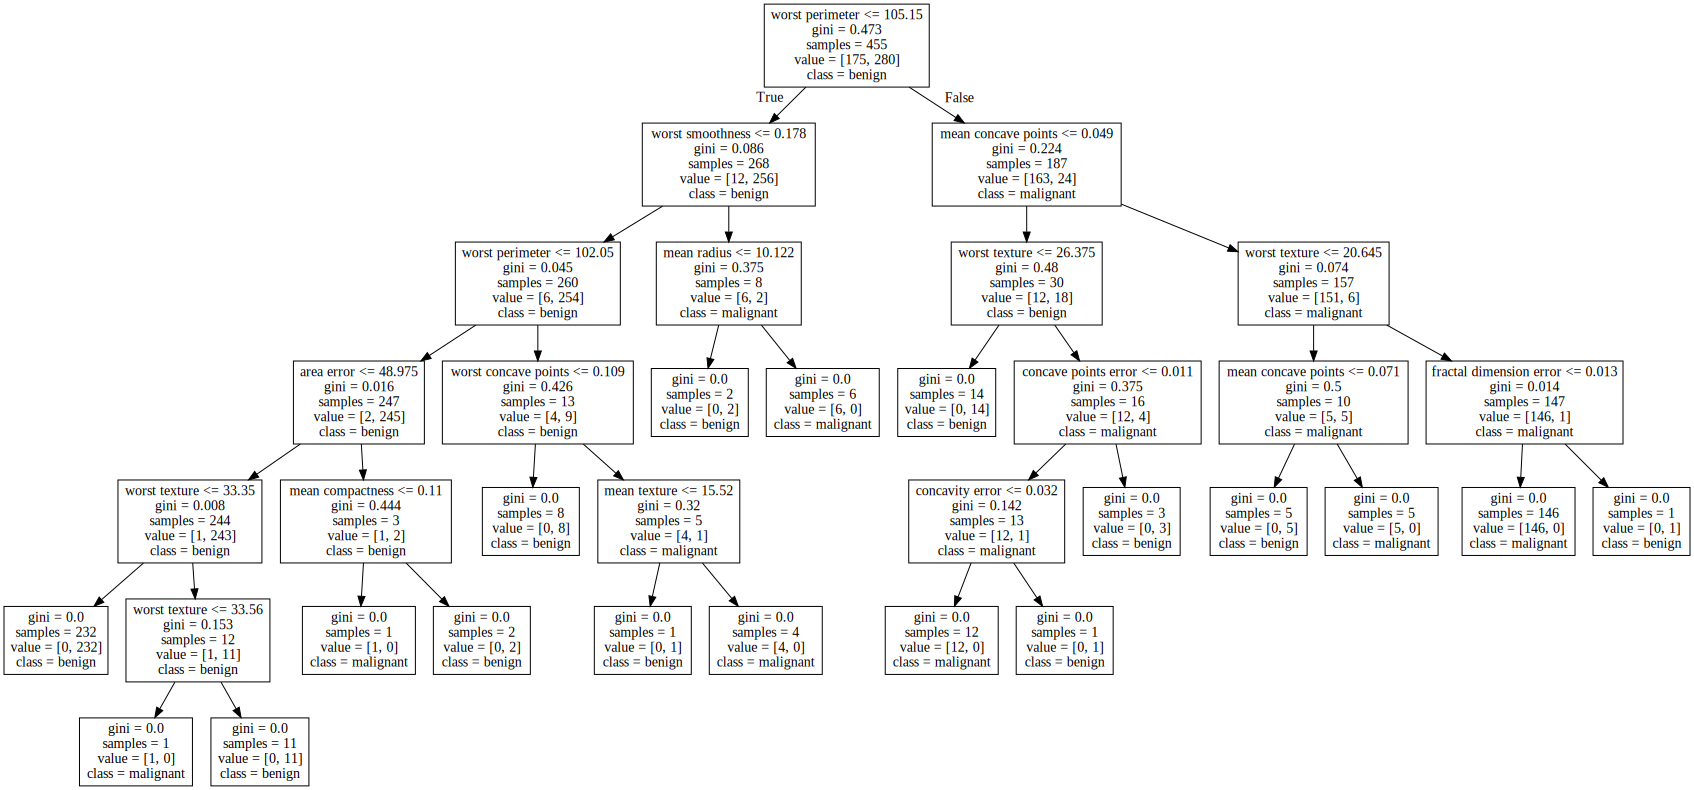

In [201]:
import graphviz
# Preprocessing of training data, fit model 
clf.fit(X_train_full, y_train)

#r = tree.export_text(model, feature_names = [d for d in data.feature_names])
dot_dataDTL = tree.export_graphviz(modelDTL, 
                  feature_names=[d for d in data.feature_names],  
                  class_names= [d for d in data.target_names])
graphDTL = graphviz.Source(dot_dataDTL)

# Preprocessing of validation data, get predictions
predsDTL = clf.predict(X_valid_full)

graphDTL

### Accuracy and F1 Score

In [202]:
from sklearn.metrics import accuracy_score, f1_score

accuracyDTL = accuracy_score(y_valid, predsDTL)
f1DTL = f1_score(y_valid, predsDTL)
score_dataDTL = {'accuracy': accuracyDTL, 'f1': f1}
scoreDTL = pd.DataFrame(data = score_dataDTL, index=['score'])
scoreDTL

,accuracy,f1
score,0.95614,0.933333


## ID3 Estimator
Berikut ini merupakan implementasi algoritma ID3 Estimator menggunakan library yang berasal dari github.

### Setup Library dan Dataset

In [203]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2)

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
235,14.030,21.25,89.79,603.4,0.09070,0.06945,0.01462,0.01896,0.1517,0.05835,...,15.33,30.28,98.27,715.5,0.1287,0.1513,0.06231,0.07963,0.2226,0.07617
252,19.730,19.82,130.70,1206.0,0.10620,0.18490,0.24170,0.09740,0.1733,0.06697,...,25.28,25.59,159.80,1933.0,0.1710,0.5955,0.84890,0.25070,0.2749,0.12970
318,9.042,18.90,60.07,244.5,0.09968,0.19720,0.19750,0.04908,0.2330,0.08743,...,10.06,23.40,68.62,297.1,0.1221,0.3748,0.46090,0.11450,0.3135,0.10550
321,20.160,19.66,131.10,1274.0,0.08020,0.08564,0.11550,0.07726,0.1928,0.05096,...,23.06,23.03,150.20,1657.0,0.1054,0.1537,0.26060,0.14250,0.3055,0.05933
513,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,0.05640,...,16.76,17.24,108.50,862.0,0.1223,0.1928,0.24920,0.09186,0.2626,0.07048


### Create Model

In [204]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator

# Define model
modelID3 = Id3Estimator()

### Fitting and predict

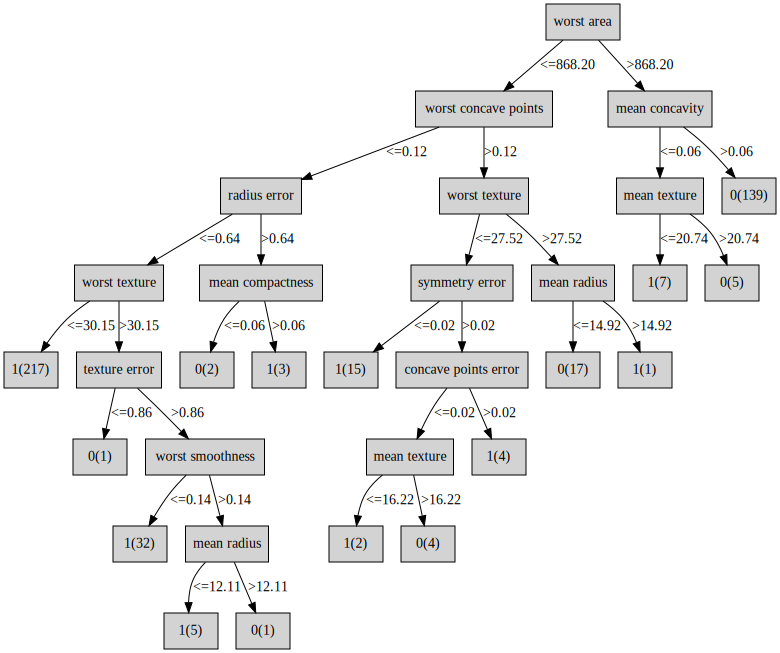

In [205]:
import graphviz
from id3 import export_graphviz

# Preprocessing of training data, fit model 
modelID3.fit(X_train_full, y_train)

#r = tree.export_text(model, feature_names = [d for d in data.feature_names])
dot_treeID3 = export_graphviz(modelID3.tree_, 'graph.dot', 
                  feature_names=[d for d in data.feature_names], 
                  )
with open("graph.dot") as f:
    dot_graphID3 = f.read()
graphID3 = graphviz.Source(dot_graphID3)

# Preprocessing of validation data, get predictions
predsID3 = modelID3.predict(X_valid_full)

graphID3

### Accuracy and F1 Score

In [206]:
from sklearn.metrics import accuracy_score, f1_score

accuracyID3 = accuracy_score(y_valid, predsID3)
f1ID3 = f1_score(y_valid, predsID3)
score_dataID3 = {'accuracy': accuracyID3, 'f1': f1ID3}
scoreID3 = pd.DataFrame(data = score_dataID3, index=['score'])
scoreID3

,accuracy,f1
score,0.903509,0.92517



## KMeans
Berikut ini merupakan implementasi algoritma KMeans menggunakan library scikit-learn.

### Setup Library dan Dataset

In [207]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2, random_state=0)

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,11.16,26.84,71.98,384.0,0.1402,0.14020,0.1055,0.06499,0.2894,0.07664
427,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,...,12.76,32.04,83.69,489.5,0.1303,0.16960,0.1927,0.07485,0.2965,0.07662
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.71,19.58,115.90,947.9,0.1206,0.17220,0.2310,0.11290,0.2778,0.07012
96,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,...,14.17,31.99,92.74,622.9,0.1256,0.18040,0.1230,0.06335,0.3100,0.08203


## Create model

In [208]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)

### Fitting and predict

In [209]:
kmeans.fit(X_train_full, y_train)

predsKmeans = kmeans.predict(X_valid_full)

### Accuracy and F1 Score

In [210]:
from sklearn.metrics import accuracy_score, f1_score

accuracyKmeans = accuracy_score(y_valid, predsKmeans)
f1Kmeans = f1_score(y_valid, predsKmeans)
score_dataKmeans = {'accuracy': accuracyKmeans, 'f1': f1}
scoreKmeans = pd.DataFrame(data = score_dataKmeans, index=['score'])
scoreKmeans

,accuracy,f1
score,0.184211,0.933333


## Logistic Regression
Berikut ini merupakan implementasi algoritma Logistic Regression menggunakan library scikit-learn.

### Setup Library dan Dataset

In [211]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2, random_state=0)

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,11.16,26.84,71.98,384.0,0.1402,0.14020,0.1055,0.06499,0.2894,0.07664
427,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,...,12.76,32.04,83.69,489.5,0.1303,0.16960,0.1927,0.07485,0.2965,0.07662
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.71,19.58,115.90,947.9,0.1206,0.17220,0.2310,0.11290,0.2778,0.07012
96,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,...,14.17,31.99,92.74,622.9,0.1256,0.18040,0.1230,0.06335,0.3100,0.08203


### Create model

In [212]:
from sklearn.linear_model import LogisticRegression
modelLogistic = LogisticRegression(random_state=0)

### Fitting and predict

In [213]:
modelLogistic.fit(X_train_full, y_train)

predsLogistic = modelLogistic.predict(X_valid_full)

C:\Python 36-64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Accuracy and F1 Score

In [214]:
from sklearn.metrics import accuracy_score, f1_score

accuracyLogistic = accuracy_score(y_valid, predsLogistic)
f1Logistic = f1_score(y_valid, predsLogistic)
score_dataLogistic = {'accuracy': accuracyLogistic, 'f1': f1Logistic}
scoreLogistic = pd.DataFrame(data = score_dataLogistic, index=['score'])
scoreLogistic

,accuracy,f1
score,0.947368,0.954545


## Neural Network
Berikut ini merupakan implementasi algoritma Neural Network menggunakan library scikit-learn.

### Setup Library dan Dataset

In [215]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2)

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
365,20.440,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,0.1618,0.05557,...,24.310,26.37,161.20,1780.0,0.1327,0.23760,0.2702,0.17650,0.2609,0.06735
12,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,...,20.960,29.94,151.70,1332.0,0.1037,0.39030,0.3639,0.17670,0.3176,0.10230
49,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,0.05718,...,15.150,31.82,99.00,698.8,0.1162,0.17110,0.2282,0.12820,0.2871,0.06917
103,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.03029,0.1945,0.06322,...,10.760,26.83,72.22,361.2,0.1559,0.23020,0.2644,0.09749,0.2622,0.08490
314,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,0.2163,0.07359,...,8.952,22.44,56.65,240.1,0.1347,0.07767,0.0000,0.00000,0.3142,0.08116


### Create model

In [216]:
from sklearn.neural_network import MLPClassifier

modelNeural = MLPClassifier(random_state=1, max_iter=300)

### Fitting and predict

In [217]:
modelNeural.fit(X_train_full, y_train)
predsNeural = modelNeural.predict(X_valid_full)

### Accuracy and F1 Score

In [218]:
from sklearn.metrics import accuracy_score, f1_score

accuracyNeural = accuracy_score(y_valid, predsNeural)
f1Neural = f1_score(y_valid, predsNeural)
score_dataNeural = {'accuracy': accuracyNeural, 'f1': f1Neural}
scoreNeural = pd.DataFrame(data = score_dataNeural, index=['score'])
scoreNeural

,accuracy,f1
score,0.964912,0.975


## SVM
Berikut ini merupakan implementasi algoritma SVM (Support Vector Machine) menggunakan library scikit-learn.

### Setup Library dan Dataset

In [219]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2)

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
393,21.61,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.15620,0.2162,0.06606,...,26.23,28.74,172.00,2081.0,0.1502,0.5717,0.7053,0.24220,0.3828,0.10070
321,20.16,19.66,131.10,1274.0,0.08020,0.08564,0.11550,0.07726,0.1928,0.05096,...,23.06,23.03,150.20,1657.0,0.1054,0.1537,0.2606,0.14250,0.3055,0.05933
317,18.22,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.07950,0.1807,0.05664,...,21.84,25.00,140.90,1485.0,0.1434,0.2763,0.3853,0.17760,0.2812,0.08198
372,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,0.1973,0.06183,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.4024,0.19660,0.2730,0.08666
320,10.25,16.18,66.52,324.2,0.10610,0.11110,0.06726,0.03965,0.1743,0.07279,...,11.28,20.61,71.53,390.4,0.1402,0.2360,0.1898,0.09744,0.2608,0.09702


### Create model

In [220]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

modelSVM = make_pipeline(StandardScaler(), SVC(gamma='auto'))

### Fitting and predict

In [221]:
modelSVM.fit(X_train_full, y_train)
predsSVM = modelSVM.predict(X_valid_full)

### Accuracy and F1 Score

In [222]:
from sklearn.metrics import accuracy_score, f1_score

accuracySVM = accuracy_score(y_valid, predsSVM)
f1SVM = f1_score(y_valid, predsSVM)
score_dataSVM = {'accuracy': accuracySVM, 'f1': f1SVM}
scoreSVM = pd.DataFrame(data = score_dataSVM, index=['score'])
scoreSVM

,accuracy,f1
score,0.973684,0.978417


## Analisis Accuracy and F1 Score
Analisis Accuracy dan F1 Score dari setiap model yang digunakan

In [223]:
accuracyAll = [accuracyDTL, accuracyID3, accuracyKmeans, accuracyLogistic, accuracyNeural, accuracySVM]
f1All = [f1DTL, f1ID3, f1Kmeans, f1Logistic, f1Neural, f1SVM]
score_dataAll = {'accuracy': accuracyAll, 'f1': f1All}
allScore = pd.DataFrame(data = score_dataAll, index=['D', ])
allScore

,accuracy,f1
0,0.956140,0.967320
1,0.903509,0.925170
2,0.184211,0.000000
3,0.947368,0.954545
4,0.964912,0.975000
5,0.973684,0.978417


# Dataset Play Tennis